### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

# 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
#Importing dataset
path=r'C:\Users\User01\Analysing India Air Quality Data'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'city_final_V2.pkl'))

In [4]:
df.head()

,State,City,Year,Month,PM,Nitric,CO,NH3,O3,SO2,BTX,AQI,Level_of_Concern
0,Andhra Pradesh,Amaravati,2017,11,194.958571,43.172857,0.120000,11.531429,118.801429,18.595714,6.177143,157.857143,Hazardous
1,Andhra Pradesh,Amaravati,2017,12,229.464516,70.963548,0.151935,17.501290,77.179355,14.312903,4.726774,194.129032,Hazardous
2,Andhra Pradesh,Amaravati,2018,1,215.278387,73.489032,0.069355,21.212903,68.874194,14.839355,6.280645,172.451613,Hazardous
3,Andhra Pradesh,Amaravati,2018,2,155.282143,45.791786,0.575000,17.724643,28.923571,11.025714,3.023929,107.035714,Hazardous
4,Andhra Pradesh,Amaravati,2018,3,117.172581,35.543226,0.706774,13.217097,22.076452,10.769355,2.160000,77.516129,Hazardous


In [5]:
df.shape

(1001, 13)

In [6]:
# Data Wrangling
# select only the numerical columns and put them in a list called columns
columns=['Year','PM', 'Nitric', 'CO', 'NH3', 'O3', 'SO2', 'BTX', 'AQI']

In [7]:
# create a subset
df2 = df[columns]

In [8]:
df2.head()

,Year,PM,Nitric,CO,NH3,O3,SO2,BTX,AQI
0,2017,194.958571,43.172857,0.120000,11.531429,118.801429,18.595714,6.177143,157.857143
1,2017,229.464516,70.963548,0.151935,17.501290,77.179355,14.312903,4.726774,194.129032
2,2018,215.278387,73.489032,0.069355,21.212903,68.874194,14.839355,6.280645,172.451613
3,2018,155.282143,45.791786,0.575000,17.724643,28.923571,11.025714,3.023929,107.035714
4,2018,117.172581,35.543226,0.706774,13.217097,22.076452,10.769355,2.160000,77.516129


# 2. Elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\User01\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User01\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\User01\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User01\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

[-30279542.236077406,
 -15217250.524979426,
 -11481643.877978198,
 -8822937.72630884,
 -7304586.816748551,
 -6253214.984568179,
 -5439424.460329268,
 -4890936.705438753,
 -4368322.626996433]

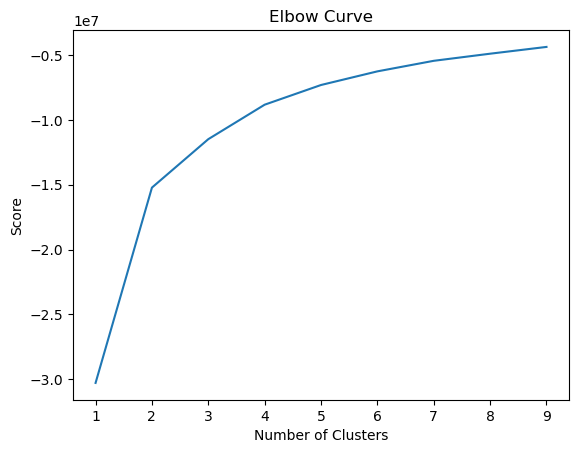

In [11]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is four.

# 3. K-Means Clustering

In [12]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4) 

In [13]:
# Fit the k-means object to the data.
kmeans.fit(df2)

C:\Users\User01\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User01\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=4)

In [14]:
df2['clusters'] = kmeans.fit_predict(df2)

C:\Users\User01\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User01\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\User01\AppData\Local\Temp\ipykernel_13560\3385428573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clusters'] = kmeans.fit_predict(df2)


In [15]:
df2.head()

,Year,PM,Nitric,CO,NH3,O3,SO2,BTX,AQI,clusters
0,2017,194.958571,43.172857,0.120000,11.531429,118.801429,18.595714,6.177143,157.857143,0
1,2017,229.464516,70.963548,0.151935,17.501290,77.179355,14.312903,4.726774,194.129032,0
2,2018,215.278387,73.489032,0.069355,21.212903,68.874194,14.839355,6.280645,172.451613,0
3,2018,155.282143,45.791786,0.575000,17.724643,28.923571,11.025714,3.023929,107.035714,0
4,2018,117.172581,35.543226,0.706774,13.217097,22.076452,10.769355,2.160000,77.516129,1


In [16]:
df2['clusters'].value_counts()

1    524
0    342
2     74
3     61
Name: clusters, dtype: int64

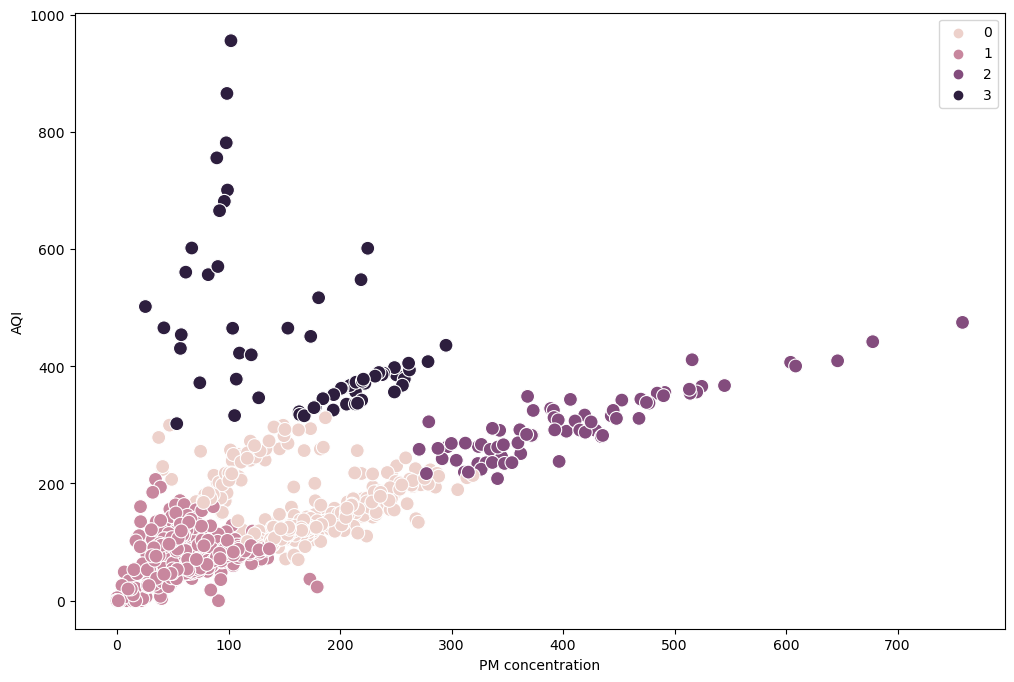

In [17]:
# Plot the clusters for the "PM" and "AQI" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['PM'], y=df2['AQI'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('PM concentration') # Label x-axis.
plt.ylabel('AQI') # Label y-axis.
plt.show()

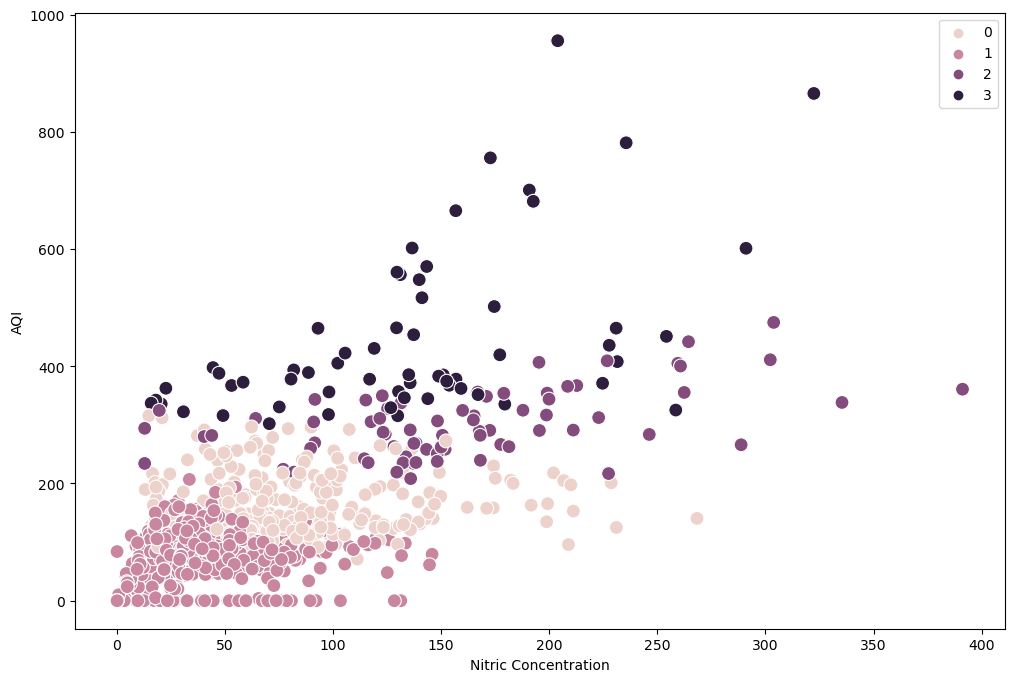

In [18]:
# Plot the clusters for the "Nitric" and "AQI" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Nitric'], y=df['AQI'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Nitric Concentration') 
plt.ylabel('AQI') 
plt.show()

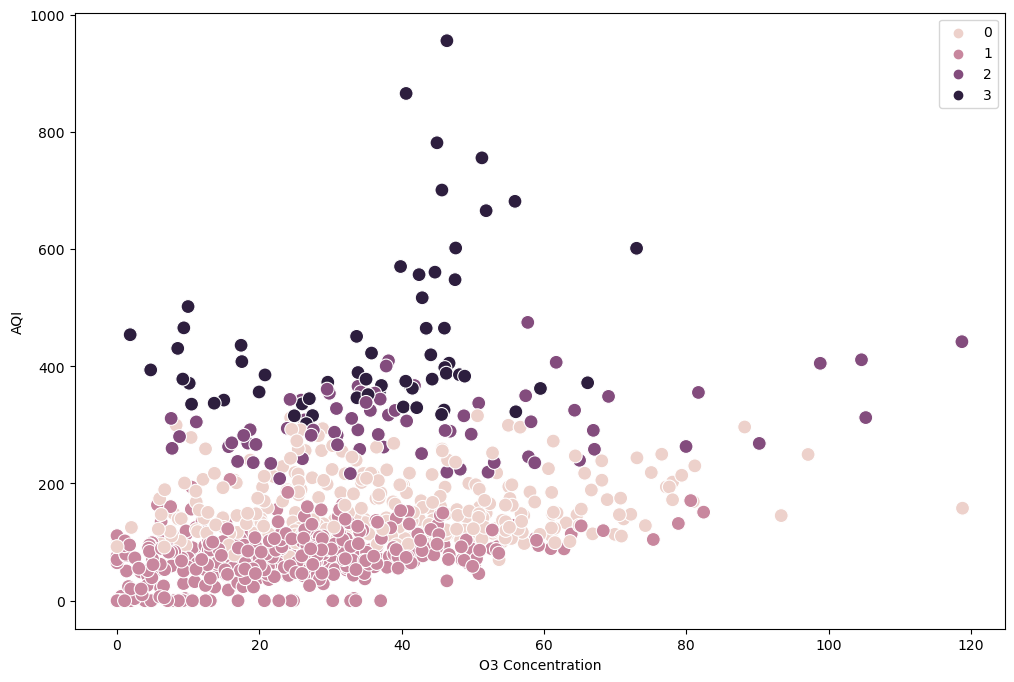

In [19]:
# Plot the clusters for the "Ozone" and "AQI" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['O3'], y=df['AQI'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('O3 Concentration') 
plt.ylabel('AQI') 
plt.show()

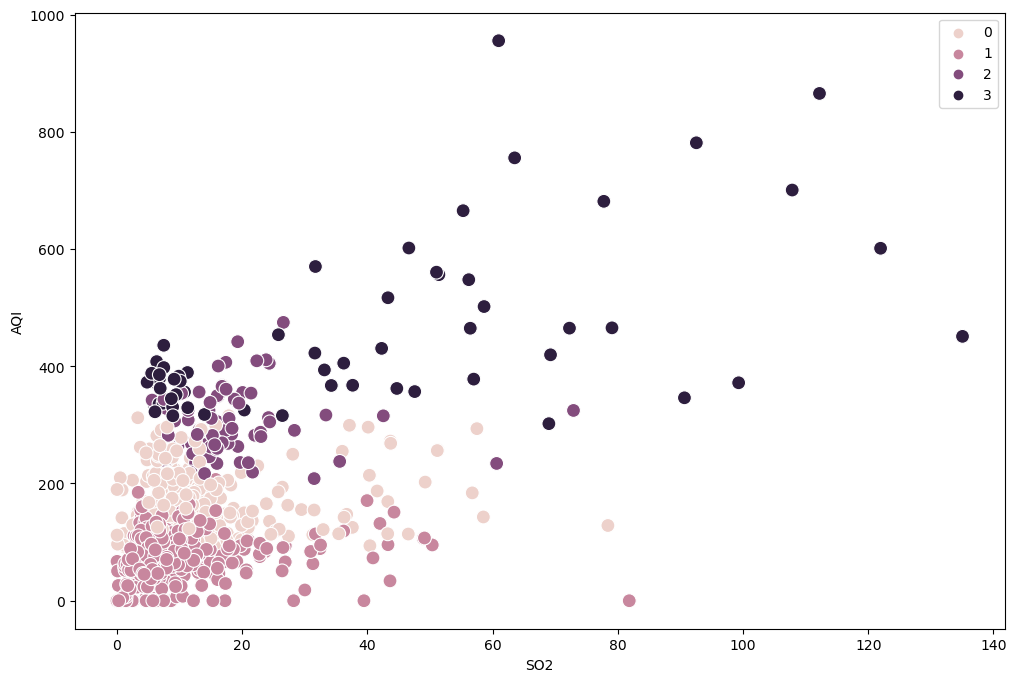

In [20]:
# Plot the clusters for the "Sulfur Dioxide" and "AQI" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['SO2'], y=df['AQI'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('SO2') 
plt.ylabel('AQI') 
plt.show()

In [21]:
df2.loc[df2['clusters'] == 3, 'cluster'] = 'dark purple'
df2.loc[df2['clusters'] == 2, 'cluster'] = 'medium purple'
df2.loc[df2['clusters'] == 1, 'cluster'] = 'purple'
df2.loc[df2['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\User01\AppData\Local\Temp\ipykernel_13560\3481568346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2['clusters'] == 3, 'cluster'] = 'dark purple'


In [22]:
df2.groupby('cluster').agg({'PM':['mean', 'median'], 
                         'Nitric':['mean', 'median'], 
                         'O3':['mean', 'median'],
                          'SO2':['mean', 'median']})

PM                  Nitric                     O3  \
                     mean      median        mean      median       mean   
cluster                                                                    
dark purple    167.078333  180.761613  136.442822  135.617419  35.714345   
medium purple  409.977844  391.570489  161.177889  150.270384  42.389865   
pink           171.385297  165.020000   78.072935   70.295968  37.627813   
purple          56.801992   55.909839   38.860335   34.424000  21.624510   

                                SO2             
                  median       mean     median  
cluster                                         
dark purple    40.563871  38.517813  31.688667  
medium purple  36.838762  18.360953  16.115183  
pink           34.660616  12.943992  10.246129  
purple         20.713414   8.113884   6.163833

##### Based on the provided statistics for PM, Nitric (Nitrogen Dioxide), O3 (Ozone), and SO2 (Sulfur Dioxide) in different clusters, we can draw the following conclusions:

- PM (Particulate Matter):
  - The "dark purple" cluster has the highest mean and median PM levels, indicating the highest concentration of particulate matter among the clusters.
  - The "purple" cluster has the lowest mean and median PM levels, suggesting the lowest concentration of particulate matter.

- Nitric (Nitrogen Dioxide):
  - The "Medium purple" cluster has the highest mean and median Nitric levels, indicating the highest concentration of Nitrogen Dioxide among the clusters.
  - The "purple" cluster has the lowest mean and median Nitric levels, suggesting the lowest concentration of Nitrogen Dioxide.

- O3 (Ozone):
  - The "Medium purple" cluster has the highest mean and median O3 levels, indicating the highest concentration of Ozone among the clusters.
  - The "purple" cluster has the lowest mean and median O3 levels, suggesting the lowest concentration of Ozone.

- SO2 (Sulfur Dioxide):
  - The "dark purple" cluster has the highest mean and median SO2 levels, indicating the highest concentration of Sulfur Dioxide among the clusters.
  - The "purple" cluster has the lowest mean and median SO2 levels, suggesting the lowest concentration of Sulfur Dioxide.

These conclusions are based on the provided statistics of mean and median values for each pollutant component in different clusters.

In [23]:
# Exporting final data set as pkl. format
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'city_final_V3.pkl'))

In [24]:
# Exporting to csv
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'city_final_V3.csv'))

In [25]:
# Exporting to csv
df2.to_csv(os.path.join(path, '02 Data','Prepared Data', 'city_final_V4.csv'))